In [1]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True,max_split_size_mb:256"

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import sam3
from PIL import Image
from sam3 import build_sam3_image_model
from sam3.model.box_ops import box_xywh_to_cxcywh
from sam3.model.sam3_image_processor import Sam3Processor
from sam3.visualization_utils import draw_box_on_image, normalize_bbox, plot_results

sam3_root = os.path.join(os.path.dirname(sam3.__file__), "..")

from Utils.image_utils import DataLoader

data_loader = DataLoader()

In [3]:
import torch

# turn on tfloat32 for Ampere GPUs
# https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

# use bfloat16 for the entire notebook
torch.autocast("cuda", dtype=torch.bfloat16).__enter__()

In [4]:
from huggingface_hub import hf_hub_download
hf_hub_download(repo_id="facebook/sam3", filename="config.json")

'/home/abdullahrehman/.cache/huggingface/hub/models--facebook--sam3/snapshots/3c879f39826c281e95690f02c7821c4de09afae7/config.json'

In [5]:
model = build_sam3_image_model()
processor = Sam3Processor(model)

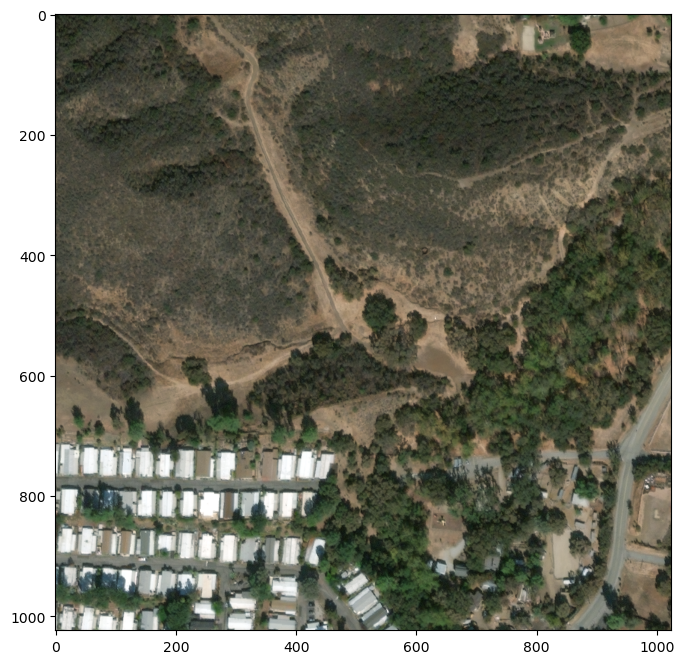

In [6]:
scene_image = data_loader.PlotImageFromSceneID(scene_id="woolsey_0093", with_labels=False)

In [ ]:
with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    inference_state = processor.set_image(scene_image)

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.60 GiB. GPU 0 has a total capacity of 5.61 GiB of which 253.06 MiB is free. Including non-PyTorch memory, this process has 5.35 GiB memory in use. Of the allocated memory 5.20 GiB is allocated by PyTorch, and 51.45 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)